# Análisis de Ventas Globales 

## PASO 4A - Visualizaciones Temporales
Por **Daniel Palacio** (github.com/palaciodaniel) - Noviembre 2021

Habiendo construido el dataset definitivo, con información limpiada y optimizada, ahora es el momento de realizar las visualizaciones.

Esto no significa que no sean necesarios nuevos cambios sobre el dataset, pero los mismos no apuntan a corregir o modificar datos, sino a adaptar la información para que pueda ser desplegada de manera correcta.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Carga y configuración de dataset

In [2]:
# A partir de ahora se usará formato CSV.
df = pd.read_csv("sales_final.csv", 
                   usecols = ["Date", "Sales"])

# Los datos quedarán ordenados por fecha, en orden cronológico
df.sort_values("Date", axis = 0, ascending = True, inplace = True)

# Reinicio de índice
df.reset_index(drop = True, inplace = True)

# Sanity check: ¿saldrán las primeras fechas de 2012 primero?
df.head(2)

,Date,Sales
0,2012-01-12,130.96
1,2012-01-12,67.86


In [3]:
# Sanity check: ¿saldrán las últimas fechas de 2014?

df.tail(2)

,Date,Sales
77566,2014-06-26,102.83
77567,2014-06-26,130.27


In [4]:
# Será necesario que la columna de fechas tenga formato "datetime". ¿Qué formato tiene ahora?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77568 entries, 0 to 77567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    77568 non-null  object 
 1   Sales   77568 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [5]:
# Transformar la columna "Date" a formato "datetime"

df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77568 entries, 0 to 77567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    77568 non-null  datetime64[ns]
 1   Sales   77568 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB


In [6]:
# Sanity check: constatar que los tres años son considerados como tales

(df["Date"].dt.year).unique()

array([2012, 2013, 2014])

In [7]:
# Sanity check: constatar que se consideran los 12 meses

(df["Date"].dt.month).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [8]:
# Ubicar columna "Date" como índice

df.set_index("Date", inplace = True)

El siguiente paso es clave, ya que alterará toda la información del dataset, filtrándolo por meses y aplicando la suma de "Sales" para cada mes.

Nótese que el índice reflejará los últimos días de cada mes. Esto puede ser informativo para dar cuenta de aquellos meses que contarán con un día más de recaudación.

In [9]:
df_monthly = df.resample("M")[["Sales"]].sum() # El doble corchete fuerza a crear un DataFrame.

df_monthly.head()

,Sales
Date,
2012-01-31,1292010.72
2012-02-29,2852617.19
2012-03-31,2353680.93
2012-04-30,2676966.29
2012-05-31,2191371.34


In [10]:
# Cantidad de meses, representados por sus últimos días

df_monthly.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

Estos preparativos no serán los últimos, pero en este punto ya permiten comenzar con la primer visualización.

- - -

## Visualizaciones Temporales

#### Justificación de métricas

Para esta primer etapa de visualizaciones, el criterio agrupador es la dimensión temporal, es decir, los cambios en la obtención de ganancias a lo largo de los años investigados.

Este tipo de métricas son fundamentales, simplemente porque sin ellas es imposible conocer dónde está parado el negocio, la salud de sus finanzas, y los riesgos, inversiones factibles e incluso oportunidades que podrían aprovecharse para expandir la empresa.

Además, los patrones que se observen también pueden representar proyecciones a futuro, o bien revelar tendencias estacionales sobre las que estos gráficos arrojarán luz. Asimismo, pueden permitir ulteriores análisis de corte socioeconómico.

Para finalizar, si bien los gráficos generados apuntan a un nivel global de ganancias, por supuesto los mismos criterios podrán ir siendo afinados posteriormente para focalizar en semanas, días específicos o bien agregar filtros adicionales como ciudades, clientes o productos.

- - -

### Primer Gráfico - Line Plot (Serie Temporal)

El siguiente gráfico es útil no sólo para ver las ganancias de cada mes, sino también para constatar a lo largo del tiempo si hubo disminución o aumento de ganancias con respecto al mes anterior. 

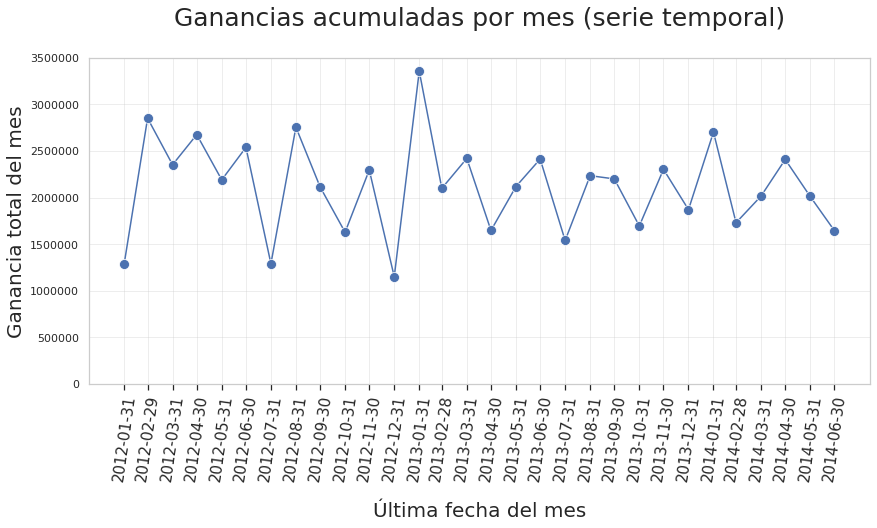

In [11]:
# Creación y configuración de Line Plot (Serie Temporal)

sns.set(rc={'figure.figsize':(14,6)})
sns.set_style("whitegrid")

sns.lineplot(x = df_monthly.index, 
             y = df_monthly["Sales"],
             alpha = 1,
             marker = "o",
             markersize = 10)

plt.tick_params(
                axis = "x", 
                reset = True,
                top = False)
plt.ticklabel_format(
                    style='plain', 
                    axis='y') # Quita la notación científica ("e") de los valores.
plt.xticks(
           df_monthly.index, 
           fontsize = 15, 
           rotation = 82)
plt.grid(alpha = 0.35) # Transparencia de la grilla de fondo.
plt.ylim((0, 3500000)) # El eje y comienza desde el valor 0.

plt.title("Ganancias acumuladas por mes (serie temporal)", fontsize = 25, y = 1.08)
plt.xlabel("Última fecha del mes", fontsize = 20, labelpad = 20)
plt.ylabel("Ganancia total del mes", fontsize = 20)

plt.show()

#### Descripción de Insights

A un nivel general, el gráfico permite identificar que las ventas mensuales, a lo largo del tiempo y salvo casos extremos, oscilan entre aproximadamente \\$1.500.000 y \\$3.000.000, manteniendo una media aproximada de \\$2.250.000. 

Además, resulta interesante notar que jamás llegan a alcanzarse períodos trimestrales de crecimiento o decrecimiento, y si un mes, por ejemplo, demuestra un aumento, muy probablemente el mes siguiente muestre que las ventas disminuyeron.

En dos años y medio, sólo hubo cuatro casos donde hubo tendencias que llegaron a durar dos meses: 
- Hubo decrecimiento de ventas desde:
 - **Agosto de 2012** a **Octubre de 2012**.
 - **Abril de 2014** a **Junio de 2014**.
 
- Hubo crecimiento de ventas desde:
 - **Abril de 2013** a **Junio de 2013**.
 - **Febrero de 2014** a **Abril de 2014**.

En general, las diferencias de venta entre un mes y el siguiente se sitúan alrededor de \\$500.000. Hubo un sólo caso donde las ventas se mantuvieron prácticamente igual, entre **Agosto de 2013** y **Septiembre de 2013**.

También hubo, por supuesto, casos de disminución de ventas súbitos entre meses consecutivos:
 - **Junio de 2012** (\~\\$2.500.000) a **Julio de 2012** (\~\\$1.250.000)
 - **Noviembre de 2012** (\~\\$2.250.000) a **Diciembre de 2012** (\~\\$1.000.000). A propósito de lo cual, es de sumo interés constatar que Diciembre de 2012 fue el mes de peor rendimiento en el período 2012-mitad de 2014, incluso considerando que se trata del mes de Año Nuevo, donde es obviamente común el aumento de consumo de productos.
 - **Enero de 2013** (\~\\$3.500.000) a **Febrero de 2013** (\~\\$2.000.000), aunque obviamente debe tenerse en cuenta la cantidad extrema de ganancias en enero, que alcanzó valores históricos.

Complementario a lo anterior, los casos de crecimientos de venta súbitos entre meses consecutivos se dieron en:
 - **Enero de 2012** (\~\\$1.250.000) a **Febrero de 2012** (\~\\$3.000.000)
 - **Julio de 2012** (\~\\$1.250.000) a **Agosto de 2012** (\~\\$2.750.000)
 - **Diciembre de 2012** (\~\\$1.000.000) a **Enero de 2013** (\~\\$3.500.000), que sin duda constituye el descubrimiento más impactante e impresionante de todos, ya que se pasó del mes con peor rendimiento del período 2012-mitad de 2014 al mes con mayores ganancias de todos, y sin duda constituye una situación única que debe ser investigada con más profundidad. 


- - -

### Segundo Gráfico - Bar Plot - Comparación entre meses

Otra buena métrica de comparación es agrupando la acumulación de ganancias en cada mes, a lo largo de los años.

En este caso las series temporales no permiten apreciar dicha comparación, por lo que para ello se utilizará este gráfico de barras verticales.

In [12]:
# Creación de nuevo dataset, donde cada año estará agrupado en columnas distintas.

pv = pd.pivot_table(df_monthly, 
                    index= df_monthly.index.month, 
                    columns = df_monthly.index.year,
                    values='Sales', 
                    aggfunc='sum')

pv.columns.name = "Año" # La leyenda en el gráfico dirá "Año"

pv

Año,2012,2013,2014
Date,,,
1,1292010.72,3357487.54,2703090.29
2,2852617.19,2100234.06,1731407.65
3,2353680.93,2421091.81,2017009.95
4,2676966.29,1648300.27,2409925.66
5,2191371.34,2119869.03,2012774.53
6,2539682.91,2414578.42,1646709.90
7,1291495.40,1540863.21,NaN
8,2756425.68,2236143.23,NaN
9,2115971.37,2201412.62,NaN


<AxesSubplot:title={'center':'Ganancias - Comparación entre meses'}, xlabel='Mes', ylabel='Ganancias (en millones)'>

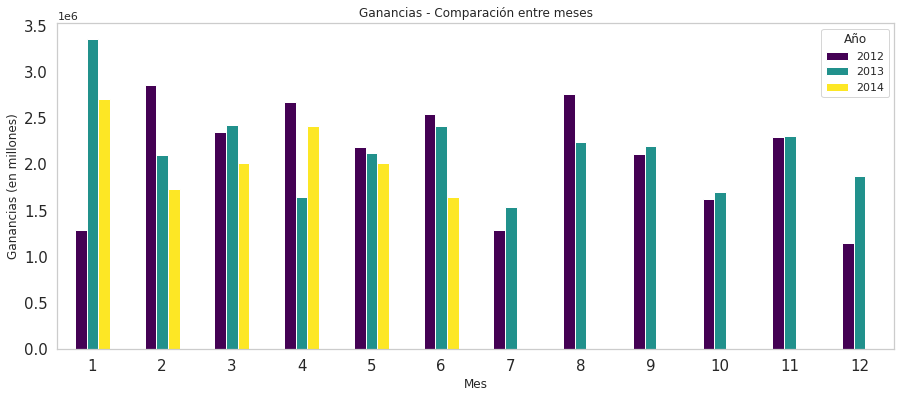

In [13]:
# Creación y configuración de Bar Plot - Comparación entre meses

pv.plot(kind = "bar", 
        title = "Ganancias - Comparación entre meses", 
        xlabel = "Mes", 
        ylabel = "Ganancias (en millones)",
        colormap = "viridis",
        figsize = (15, 6),
        fontsize = 15,
        grid = False,
        rot = 0)

#### Descripción de Insights

De entrada, el punto más evidente que arrojó este gráfico es la falta de información a partir de Julio de 2014, pero a pesar de este gran inconveniente aún así ciertas observaciones podrán extraerse.

Por una cuestión organizativa se respetará a continuación el orden de los meses.

Comenzando por **Enero**, se puede ver un enorme salto entre las ventas de 2012, que representan uno de los puntos más bajos del dataset, con respecto a 2013, que marcaron un hito histórico en cuanto a volumen de ventas. También fue el mes con mayores ventas para 2014, aunque con una diferencia significativamente menor con respecto al año anterior. Es decir, los años 2013 y 2014 fueron muy saludables en sus respectivos comienzos.

**Febrero** no puede considerarse un buen mes, ya que en cada año posterior las ventas van disminuyendo. Hay una caída estrepitosa en 2013 con respecto a 2012, y si bien 2014 no experimentó un descenso tan abrupto, de todas formas las ventas siguieron disminuyendo.

Junto con Enero, **Marzo** se trata del único mes donde las ventas ascienden en 2013 para caer en 2014. Sin embargo, a diferencia del caso de enero, las ventas en 2013 mantienen cierta cercanía con el año pasado, mostrando una caída más definida para 2014.

**Abril** fue uno de los meses más particulares, ya que tras un 2012 con uno de los niveles de venta más altos hay una caída fulminante para el año siguiente, al igual que ocurrió en el mes de febrero. Además, hay un crecimiento abrupto de ventas para 2014, que lamentablemente será el único con respecto al 2013. Es decir, a excepción de este mes, 2014 por desgracia siempre decae con respecto al año anterior.

Dentro de los meses que tienen indicadores para los tres años, **Mayo** resulta el más uniforme de todos, no obstante mostrando siempre un leve descenso de ventas a medida que pasan los años.

**Junio**, como ya se indicó antes, es el último mes para el que se tienen volúmenes de venta de 2014. Desafortunadamente se parece a febrero en el hecho de que hay una caída estrepitosa, sólo que esta vez es desde 2013 a 2014. 

En el caso de **Julio**, se registraron uno de los peores niveles de ventas en ambos años (2012 y 2013), pero al menos un punto positivo es que para 2013 las ventas fueron mayores.

Por el contrario, **Agosto** fue un mes más saludable, y si bien se muestra una caída abrupta de 2012 a 2013, éste último tuvo niveles de venta muy decentes, por lo que tal descenso se explica en el hecho de que 2012 fue uno de los meses álgidos en cuanto a ganancias, casi llegando a alcanzar los montos de febrero del mismo año.

**Septiembre, Octubre** y **Noviembre** son meses caracterizados por la uniformidad del volumen de ventas entre los dos años, mostrando una leve tendencia ascendente. Sin embargo, debe notarse que para **Octubre** los niveles de ventas no estuvieron muy lejos de alcanzar los deplorables niveles de Julio; no fue un mes destacable.

Finalmente, **Diciembre** en 2012 tuvo una de sus peores ventas en 2012, pero mostró un abrupto y positivo crecimiento para el año siguiente, el cual si bien distó mucho de ser el mejor, no obstante alcanzó márgenes muy aceptables.

- - -

### Tercer Gráfico - Bar Plot - Formato Horizontal

Este tipo de gráfico permite, desde lo visual, comparar inmediatamente las ganancias de cada mes a un nivel global. 

Debido a que las fechas están colocadas de forma horizontal, y a que los colores de las barras cambian según el año, no sólo es más intuitivo en este sentido, sino que además permitirá resaltar los meses extremos en ventas (sean bajas o altas).

Puede considerarse un gran complemento al primer gráfico de series temporales.

In [14]:
# Este gráfico estuvo mostrando los nombres de los meses de forma inadecuada, así que se agregarán 
# columnas adicionales al dataset original, para que al momento de crear la visualización 
# se puedan generar tuplas que reemplacen ese formato problemático.

# Creación de columna para mes. Se usará la abreviación del mes en vez de su número.
df_monthly["Month"] = df_monthly.index
df_monthly["Month"] = pd.to_datetime(df_monthly["Month"]).dt.strftime("%b")

# Creación de columna para año.
df_monthly["Año"] = df_monthly.index.year

df_monthly.head(4)

,Sales,Month,Año
Date,,,
2012-01-31,1292010.72,Jan,2012
2012-02-29,2852617.19,Feb,2012
2012-03-31,2353680.93,Mar,2012
2012-04-30,2676966.29,Apr,2012


In [15]:
# Traducción al español de abreviaciones de meses

df_monthly["Month"].replace(
    {
        "Jan": "Ene",
        "Apr": "Abr",
        "Aug": "Ago",
        "Dec": "Dic"
    }, inplace = True)

df_monthly["Month"].unique()

array(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep',
       'Oct', 'Nov', 'Dic'], dtype=object)

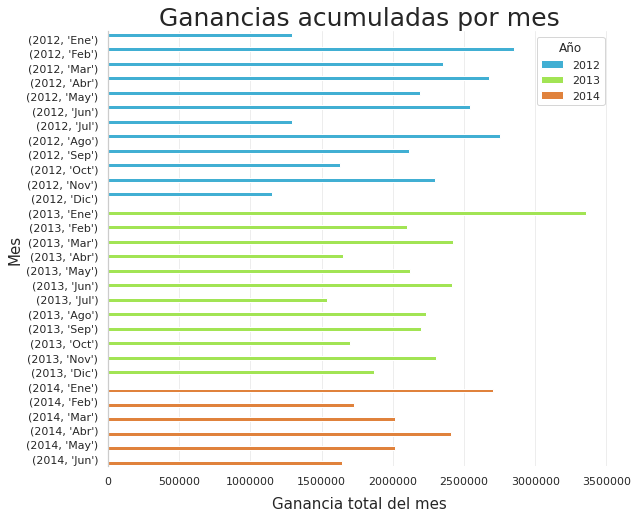

In [16]:
# Creación y configuración de Bar Plot - Formato Horizontal

sns.set(rc={'figure.figsize':(9, 8)})

sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.barplot(x = df_monthly["Sales"], 
            y = df_monthly.index, 
            alpha = 1,
            hue = df_monthly["Año"],
            palette = "turbo")

labels = list(zip(df_monthly["Año"], df_monthly["Month"])) # Lista de yticks nuevos
g.set_yticks(range(df_monthly.shape[0])) # Cantidad de yticks a reemplazar
g.set_yticklabels(labels) # Usar variable "labels" para reemplazar yticks con formato inadecuado.

plt.ticklabel_format(style='plain', axis='x') # Quita la notación científica ("e") de los valores.
plt.grid(axis = "x", alpha = 0.35) # Transparencia de la grilla de fondo.

g.spines['top'].set_visible(False) # Remoción de bordes.
g.spines['right'].set_visible(False)
g.spines['bottom'].set_visible(False)

plt.title("Ganancias acumuladas por mes", fontsize = 25)
plt.xlabel("Ganancia total del mes", fontsize = 15, labelpad = 10)
plt.ylabel("Mes", fontsize = 15)

plt.show()

#### Descripción de Insights

Como punto de referencia general, la visualización permite ver que las ganancias se ubican entre los \\$1.500.000 y \\$2.500.000. Ambos valores serán denominados como umbrales inferior y superior, respectivamente.

Considerando que se trata de las ventas de una cadena de supermercados que opera en varias partes del mundo, se observa una uniformidad bastante marcada en la acumulación de ingresos mensuales.

Bajo esta nueva perspectiva, aún los meses más extremos demuestran no estar tan alejados del resto, y los saltos súbitos en los márgenes de ingresos aún así no representan diferencias tan marcadas, como ser, por ejemplo, de 10, 20 o más millones.

Teniendo en cuenta esto, de todos modos queda claro que 2012 fue el año con más meses deficientes, habiendo tres casos (Enero, Julio y Diciembre) con niveles de venta por debajo del umbral inferior de $1.500.000. Lo positivo es que el resto de los años, incluyendo los meses menos favorecidos, como Julio de 2013, aún así traspasan esta base.

Ahora bien, también es cierto que 2012 fue el año con más meses que superaron el umbral de \\$2.500.000, específicamente Febrero, Abril, Junio y Agosto. 

No obstante lo anterior, queda claro que el valor más alto de 2012, alcanzado en Febrero, aún así dista mucho del espectacular margen de ventas de Enero 2013, que por poco supera el millón con respecto al umbral superior, pero como contrapartida, ya ningún otro mes del 2013 vuelve a traspasar dicho umbral.

2014 vuelve a tener un primer mes triunfal, con las ventas más altas del año (recordando que Junio es el último mes registrado, por supuesto). Pero este enero, si bien se impuso por sobre el umbral superior, dista mucho del enero del año anterior.

Para finalizar, y al igual que lo observado en las series temporales, acá también queda muy claro que no hay períodos de crecimiento o decrecimiento sostenidos, y las tendencias de un mes serán contrarrestadas por las del mes siguiente.

Y relacionado con lo anterior, también se pudo ver que las diferencias entre meses consecutivos pueden ser tanto suaves como súbitas, sin que parezca mediar un patrón subyacente.